Figure S23A-FD in Mahdavi & Siegel (2020) AS&T (in Supplemental Information).

This figure illustrates the scatter of recovery amount and recovery efficiency data by the pre-sieve parts of the samplers.

Plot type: Combined scatter and line plots.

In [4]:
### Essential libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

### Reading the essential data
df = pd.read_excel('natl_dataset_summary.xlsx')
df.sort_values(['ft', 'Cycle_N', 'dustmass'], inplace = True)
df.head()

,SN,Site_N,Round_N,ft,Cycle_N,dustmass,dust_rem,M_filter_post,M_filter_change,M_filter_change_cum,...,E,E_cum,C,D,CE,CE_cum,M_C,M_C_cum,Mass_C,Label
87,53,5,3,1,1,1.227,1.227,266.724,0.974,0.974,...,79.380603,79.380603,3.877823,55.890919,1.720456,1.720456,2.316222,2.316222,0.03777,NaN
123,77,20,4,1,1,2.232,2.232,315.968,0.697,0.697,...,31.227599,31.227599,26.626973,80.219839,6.670251,6.670251,72.421808,72.421808,0.18559,NaN
10,6,13,1,1,1,2.394,2.394,254.941,0.922,0.922,...,38.512949,38.512949,40.597614,80.321124,12.558480,12.558480,55.270065,55.270065,0.37431,NaN
44,30,11,2,1,1,2.946,2.946,279.440,0.560,0.560,...,19.008826,19.008826,17.103571,74.180413,2.411745,2.411745,26.280357,26.280357,0.09578,NaN
92,61,1,3,1,1,3.220,3.220,270.637,0.792,0.792,...,24.596273,24.596273,11.098485,81.080774,2.213354,2.213354,14.453283,14.453283,0.08790,NaN


In [5]:
### Making case bases
i = 1
for f in df['ft'].unique():
    for c in df[df['ft'] == f]['Cycle_N'].unique():
        df.loc[(df['ft'] == f) & (df['Cycle_N'] == c), 'counter'] = i
        i += 1
    i += 1

df = df[['ft', 'Cycle_N', 'SN', 'dustmass', 'M_t_cum', 'M_d_cum', 'M_s_cum', 'tCE_cum', 'CE_cum', 'sCE_cum' ,'counter']]


### Dictionary of graph properties
marker_dict = {
               1: 'o', 2: 'o', 3: 'o', 4: 'o', 5: 'o', 6: 'o',
               8: 's', 9: 's', 10: 's', 11: 's', 12: 's', 13: 's',
               15: '^', 16: '^', 17: '^', 18: '^', 19: '^', 20: '^',
               22: 'D', 23: 'D', 24: 'D', 25: 'D', 26: 'D', 27: 'D' 
               }

cycle_dict = {
               1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6',
               8: '1', 9: '2', 10: '3', 11: '4', 12: '5', 13: '6',
               15: '1', 16: '2', 17: '3', 18: '4', 19: '5', 20: '6',
               22: '1', 23: '2', 24: '3', 25: '4', 26: '5', 27: '6' 
               }

col_dict = {
            1: 'k', 2: 'r', 3: 'b', 4: 'g', 5: 'orange', 6: 'purple',
            8: 'k', 9: 'r', 10: 'b', 11: 'g', 12: 'orange', 13: 'purple',
            15: 'k', 16: 'r', 17: 'b', 18: 'g', 19: 'orange', 20: 'purple',
            22: 'k', 23: 'r', 24: 'b', 25: 'g', 26: 'orange', 27: 'purple'
            }


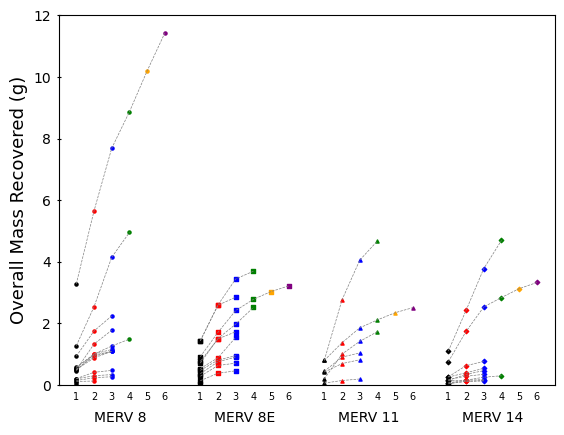

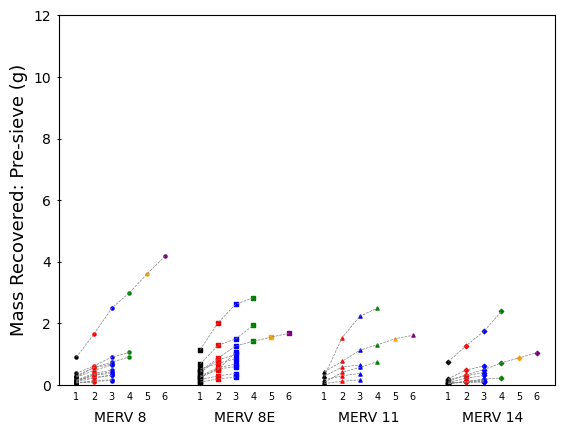

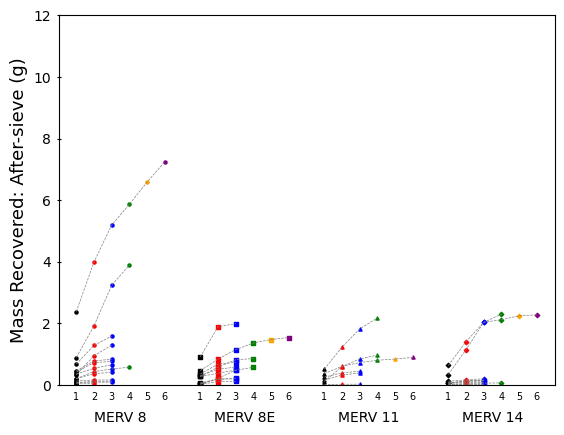

In [6]:
#############################################################
### Set 1: Recovery amount figures (Figures 23A,C, and D) ###
#############################################################

ylable_dict = {
               'M_t_cum': 'Overall Mass Recovered (g)',
               'M_d_cum': 'Mass Recovered: Pre-sieve (g)',
               'M_s_cum': 'Mass Recovered: After-sieve (g)',
               }

for item in ['M_t_cum', 'M_d_cum', 'M_s_cum']:
    plt.figure()
    for i in marker_dict.keys():
        plt.scatter(df[df['counter'] == i]['counter'], df[df['counter'] == i][item], s = 5, c = col_dict[i], marker = marker_dict[i])
    
    for sn in df['SN'].unique():
        plt.plot(df[df['SN'] == sn]['counter'], df[df['SN'] == sn][item], color='grey', linestyle = '--', linewidth = 0.5) # (0, (10, 12))

    plt.xlim(0, 28)
    plt.xticks([]) 
    plt.minorticks_off()
    
    plt.ylim(0, 12)
    plt.yticks(np.arange(0, 13, step=2))
    plt.ylabel(ylable_dict[item], size = 13)

    for key, val in cycle_dict.items():
        plt.text(key, -0.5, val, fontsize = 7, ha = 'center')
        
    plt.tick_params(axis = 'y', direction = 'inout')
    
    plt.text(3.5, -1.2, 'MERV 8', fontsize = 10, ha = 'center')
    plt.text(10.5, -1.2, 'MERV 8E', fontsize = 10, ha = 'center')
    plt.text(17.5, -1.2, 'MERV 11', fontsize = 10, ha = 'center')
    plt.text(24.5, -1.2, 'MERV 14', fontsize = 10, ha = 'center')

    plt.savefig(r'FigureS23_recovery_' + item + '.jpg', format='jpg', dpi=1600, bbox_inches='tight')


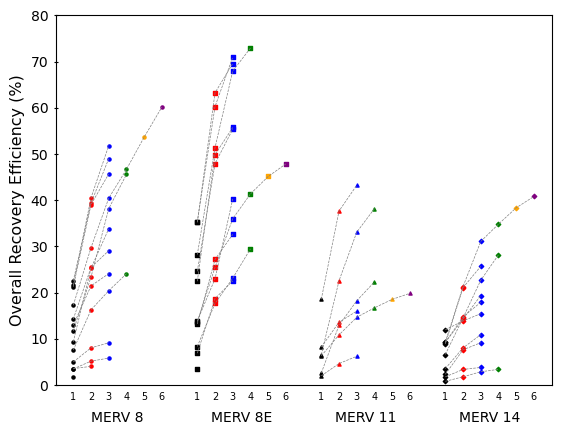

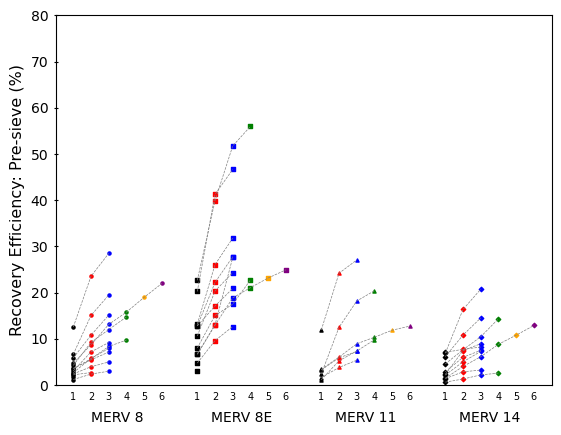

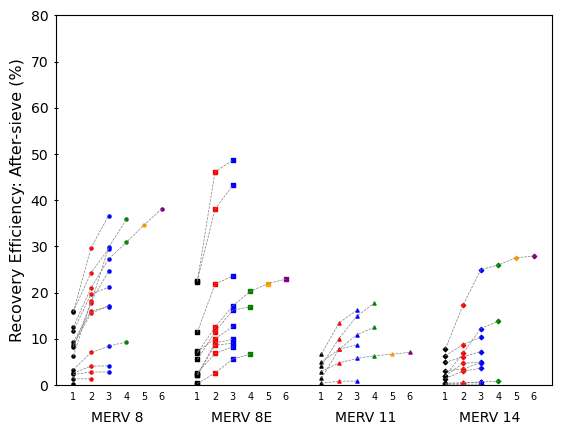

In [7]:
#################################################################
### Set 2: Recovery efficinecy figures (Figures 23A,C, and D) ###
#################################################################

ylable_dict2 = {
               'tCE_cum': 'Overall Recovery Efficiency (%)',
               'CE_cum': 'Recovery Efficiency: Pre-sieve (%)',
               'sCE_cum': 'Recovery Efficiency: After-sieve (%)',
               }

for item in ['tCE_cum', 'CE_cum', 'sCE_cum']:
    plt.figure()
    for i in marker_dict.keys():
        plt.scatter(df[df['counter'] == i]['counter'], df[df['counter'] == i][item], s = 5, c = col_dict[i], marker = marker_dict[i])
    
    for sn in df['SN'].unique():
        plt.plot(df[df['SN'] == sn]['counter'], df[df['SN'] == sn][item], color='grey', linestyle = '--', linewidth = 0.5) # (0, (10, 12))

    plt.xlim(0, 28)
    plt.xticks([]) 
    plt.minorticks_off()
    
    plt.ylim(0, 80)
    plt.yticks(np.arange(0, 90, step=10))
    plt.ylabel(ylable_dict2[item], size = 11.5)

    for key, val in cycle_dict.items():
        plt.text(key, -3.3, val, fontsize = 7, ha = 'center')
        
    plt.tick_params(axis = 'y', direction = 'inout')
    
    plt.text(3.5, -8, 'MERV 8', fontsize = 10, ha = 'center')
    plt.text(10.5, -8, 'MERV 8E', fontsize = 10, ha = 'center')
    plt.text(17.5, -8, 'MERV 11', fontsize = 10, ha = 'center')
    plt.text(24.5, -8, 'MERV 14', fontsize = 10, ha = 'center')

    plt.savefig(r'FigureS23_efficiency_' + item + '.jpg', format='jpg', dpi=1600, bbox_inches='tight')


END OF CODE